# Исследование данных о продаж компьютерных игр
## Описание задачи
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цели исследования:**
1. Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5);
    - Самые популярные жанры (топ-5);
    - Влияние рейтинга ESRB на продажи в отдельном регионе.
2. Проверить гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.

**План проведения исследовани:**

- Изучение предоставленных данных;
- Обработка пропусков, дубликатов и аномальных значений;
- Расчет и добавление параметров;
- Изучение и описание параметров (исключение выбросов);
- Оценка факторов, влияющих продажу игр.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Отличное вступление! 👍

Вся нужная информация есть.</div>

## Изучение и обработка исходных данных
### Открытие датасета и вывод общих сведений

Для открытия датасета и дальнейшей работы с ним и визуализации данных загрузим требуемые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/datasets/games.csv")
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

📌 Лучше разделять ячейки загрузки библиотек и данных. Если понадобится подключить дополнительную библиотеку, не нужно будет заново грузить данные и перезаписывать переменные.</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Принято и исправлено.</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Супер!</div>

Также построим гистограммы для визуализации содержащихся данных.

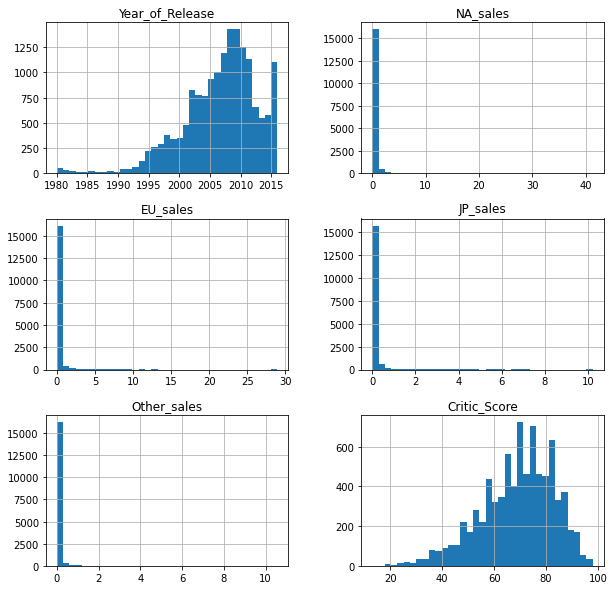

In [3]:
data.hist(bins=35, figsize=(10, 10));

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Данные загружены верно, получена общая информация о датафрейме. 🚀</div>

Исходные данные содержат 16715 записей, каждая из которых предоставляет сведения об игре: название, платформа, год выпуска, продажи по регионам, рейтинг и возрастные ограничения.

Из гистограм можно увидеть, что данные представлены более чем за 30 лет, с 1980 года. Рейтинги представляют собой оценку по 100 или 10 бальной шкале.

### Предобработка данных

В первую очередь приведем названия столбцов к "нормальному" виду.

In [4]:
data.columns = data.columns.str.lower()

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Отличный способ! 🔥</div>

Теперь проверим пропуски и изменим тип данных где это необходимо.

In [5]:
pd.DataFrame(data.isna().sum()).style.background_gradient('coolwarm')

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


Начнем со столбца `name` - всего два пропуска, но определить их реальное значение скорее всего не получится. Заменим их на `Unknown`. 

In [6]:
data['name'] = data['name'].fillna(value='Unknown')

В столбце `year_of_release` 269 пропусков, но их заполнение также затруднительно. Заменим пропуски на `0`, так будет понятно, что это пропущенное значение, и также переведем `year_of_release` в тип `int16`.

In [7]:
data['year_of_release'] = data['year_of_release'].fillna(value=0).astype('int16')

Столбец `genre` схож с `name`, поступим по той же логике:

In [8]:
data['genre'] = data['genre'].fillna(value='Unknown')

В столбце `critic_score` пропусков больше всего - предположительно не все игры оцениваются критиками. Посмотрим на уникальные значения этого столбца.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Верно, в строковых данных можно пропуски заменить на заглушку. А можно и удалить, так как их немного.</div>

In [9]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Все оценки проставлены по 100-бальной шкале и представляют собой целочисленные значения. Можно было бы оставить их в таком виде, но для уменьшения размера датасета лучше привести их к типу `int8`. Чтобы сделать это и не потерять пропущенные значения, присвоим последним значение `-1`, такая оценка невозможна и даст понять при дальнейшей работе с данными, что эти игры не получили оценки критиков.

In [10]:
data['critic_score'] = data['critic_score'].fillna(value= -(1)).astype('int8')

Столбец `user_score` изначально имеет тип `object `, что довольно странно для столбца в котором должны быть числа, изучим уникальные значения:

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как видно числа храняться в виде строк, кроме того имеются значения типа `tbd` и пропущенные значения. Значение `tbd` расшифровывается как `to be determined`, скорее всего для объективной оценки игры не хватает количества поставленных оценок. Как и для столбца `critic_score` изменим пропущенные значения на `-1`, то же самое сделаем со значением `tbd`. При изменении типа данных учтем, что оценка ставится по 10-бальной шкале и может быть дробной.

In [12]:
data['user_score'] = data['user_score'].replace(to_replace='tbd', value=-1)\
.fillna(value=-1)\
.astype('float32')

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Здесь тоже можно поставить заглушку на пропуски, главное не забыть ее отфильтровать при расчете корреляций и проверке гипотез.</div>

Последняя оставшаяся колонка `rating`, проверим уникальные значения:

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В колонке категориальные значения - поставим `Unknown` вместо `NaN`.

In [14]:
data['rating'] = data['rating'].fillna(value='Unknown')

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Правильное решение - выделить игры без рейтинга в отдельную категорию, они нам понадобятся дальше для анализа.

Также, можно посмотреть нет ли устаревших значений рейтинга.</div>

Теперь проверим данные на явные и неявные дубликаты.

In [15]:
data.duplicated().sum()

0

Явных дубликатов нет. Теперь проверим на неявные. Начнем с `platform`:

In [16]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Неявных дубликатов нет 
(_В реальной ситуации стоит обратиться к специалистам компании для уточнения, либо провести краткий анализ платформ в интернете_)

Переходим к столбцу `genre`:

In [17]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'Unknown'], dtype=object)

 Неявных дубликатов нет.
 
 Проверим наличие дубликатов по паре "название игры - платформа":

In [18]:
data.loc[:, ['name', 'platform']].duplicated().sum()

5

Удаляем задвоенные строки:

In [19]:
data = data.drop(data[data.loc[:, ['name', 'platform']].duplicated()].index)

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Также можно проверить наличие дубликатов по паре "название игры - платформа".</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Нашел и удалил 5 дублей. А стоит ли в таком случае проводить анализ на предмет того, какие именно строки удаляем? Сейчас, по умолчанию оставлены первые вхождения, но вдруг у вторых больше информации?</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Я бы вывел их на экран и посмотрел действительно ли это дубликаты, или может переиздания? 🙂</div>

Завершаем предобработку добавлением столбца с общим количеством продаж:

In [20]:
data['total_sales'] = data.loc[:, 'na_sales':'other_sales'].sum(axis=1)

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Общие продажи посчитаны верно! 👍
</div>

Еще раз выведем информацию о таблице и первые строки:

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16710 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16710 non-null  int16  
 3   genre            16710 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     16710 non-null  int8   
 9   user_score       16710 non-null  float32
 10  rating           16710 non-null  object 
 11  total_sales      16710 non-null  float64
dtypes: float32(1), float64(5), int16(1), int8(1), object(4)
memory usage: 1.4+ MB


In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Unknown,31.38


**Итог:**
- Названия приведены к "нормальному" типу;
- Следующим образом обработаны пропуски:
    - столбец `name`, 2 пропуска - заменены на `Unknown`;
    - столбец `year_of_release`, 269 пропусков - заменены на `0`;
    - столбец `genre`, 2 пропуска - заменены на `Unknown`;
    - столбец `critic_score`, 8578 пропусков - заменены на `-1`;
    - столбец `user_score`, 6701 пропуск - заменены на `-1`;
    - столбец `rating`, 6766 пропусков - заменены на `Unknown`.
- Значения `tbd` в `user_score` заменены на `-1`;
- Обнаружены и удалены 5 дубликатов по паре "название игры - платформа";
- Изменены типы данных:
    - `year_of_release` на тип `int16`;
    - `critic_score` на тип `int8`;
    - `user_score` на тип `float32`;
    - `user_score` на тип `float32`;
- Добавлен столбец с общими продажами - `total_sales`.

### Анализ данных
#### Начнем с года выпуска игр и посмотрим на распределение.

Для начала посмотрим какие годы попали в датасет:

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Хорошо бы разделять ячейки Markdown в разделах работы, так мне будет проще их комментировать.
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Принято и исправлено по всему проекту.</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Отлично!</div>

In [23]:
display(len(data['year_of_release'].sort_values().unique()))
data['year_of_release'].sort_values().unique()

38

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int16)

Итого 37 лет (значение `0` поставлено как "заглушка для пропущенных данных"). Построим гистограмму для наглядной визуализации и выведем точные значения в табличном виде:

year_of_release
0        268
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     938
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     651
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

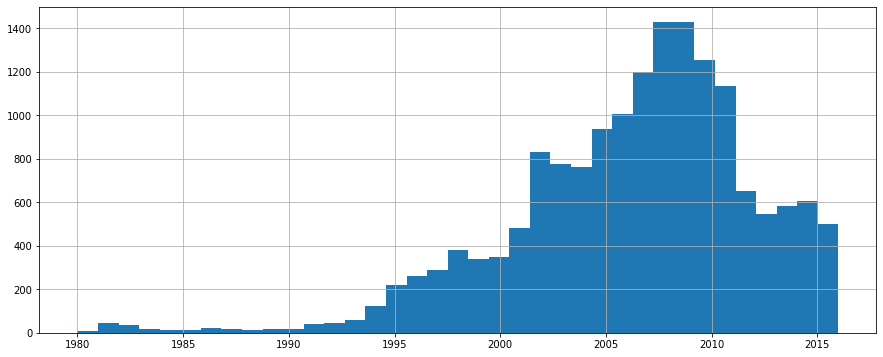

In [24]:
display(data.groupby(by='year_of_release').count()['name'])
data['year_of_release'].hist(figsize=(15,6), bins=37, range=(1980, 2016));

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Верно, до середины 90-х игр выпускалось крайне мало, этот период можно дальше не учитывать.  </div>

Судя по графику наибольшее количество игр из датасета было выпущено в 2005-2011 годах. Затем следует спад в количестве игр, возможно дальнейший анализ анализ сможет подсказать почему это произошло. Также выделяется период с 1980 по 1993, который выглядит незначительным по объему продаж, видимо тогда технологии для игр только развивались. Но сразу после этого начинается ощутимый рост.

#### Выбор актуального периода:

Стоит помнить, что задача исследования заключается в построении прогнозов на 2017 год, поэтому имеет смысл опираться на свежие данные по играм и поведению пользователя, которое также меняется. При выборе актуального периода учтем значительное сокращение количества выпущенных игр в 2010-2011 гг., явно вызванное какими-то изменениями на рынке и запросов потребителя. Ограничим актуальный период годами после спада: 2012-2016 гг.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Актуальный период выбран правильно. Брать для прогноза данные более чем за 5 лет для такой динамичной индустрии как видеоигры - нецелесообразно, можно захватить уходящие тренды.</div>

In [25]:
data_actual = data[data['year_of_release'] >= 2012]
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2884 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2884 non-null   object 
 1   platform         2884 non-null   object 
 2   year_of_release  2884 non-null   int16  
 3   genre            2884 non-null   object 
 4   na_sales         2884 non-null   float64
 5   eu_sales         2884 non-null   float64
 6   jp_sales         2884 non-null   float64
 7   other_sales      2884 non-null   float64
 8   critic_score     2884 non-null   int8   
 9   user_score       2884 non-null   float32
 10  rating           2884 non-null   object 
 11  total_sales      2884 non-null   float64
dtypes: float32(1), float64(5), int16(1), int8(1), object(4)
memory usage: 245.0+ KB


Итого остается 2886 игр, которые будут проанализированы и использованы для создания прогноза.

#### Изменение продаж по платформам за все время:

Перед тем как изучать данные по актуальному периоду вернемся еще раз к общему датасету и посмотрим на развитие платформ в течение времени. Для начала выберем 10 платформ с наибольшим количеством игр и построим для них гистограмы.

In [26]:
# Собираем сводную таблицу по суммарным продажам игр на каждой платформе по годам и сортируем по общим продажам
data_pivot = data.pivot_table(values='total_sales', 
                index='year_of_release', 
                columns='platform', 
                aggfunc='sum', 
                margins=True,
                margins_name='Total')\
.sort_values(by='Total', axis=1, ascending=False)\
#.drop(labels='Total', axis=1)

pd.set_option('display.max_columns', None) # Вывыведем все колонки, чтобы увидеть первые 10 платформ
pd.set_option('display.max_rows', 10) #Наиболее интересные колонки - наименование и общие продажи, остальное можно не выводить 
data_pivot

platform,Total,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC,3DS,XB,GB,NES,N64,SNES,GC,XOne,2600,WiiU,PSV,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98.44,22.21,10.18,7.83,16.33,3.34,3.28,4.97,NaN,4.52,3.76,1.19,6.17,1.03,NaN,0.67,NaN,2.20,NaN,10.50,NaN,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,16.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,361.24,NaN,88.58,113.25,8.59,1.54,NaN,NaN,25.99,3.14,12.38,56.57,NaN,NaN,NaN,NaN,NaN,NaN,18.96,NaN,21.65,10.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,331.53,NaN,34.74,47.76,3.75,NaN,NaN,NaN,100.00,0.24,13.28,43.76,NaN,NaN,NaN,NaN,NaN,NaN,54.07,NaN,22.03,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,267.98,NaN,11.96,16.82,1.14,NaN,NaN,NaN,118.90,0.12,8.52,27.78,NaN,NaN,NaN,NaN,NaN,NaN,60.14,NaN,16.35,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


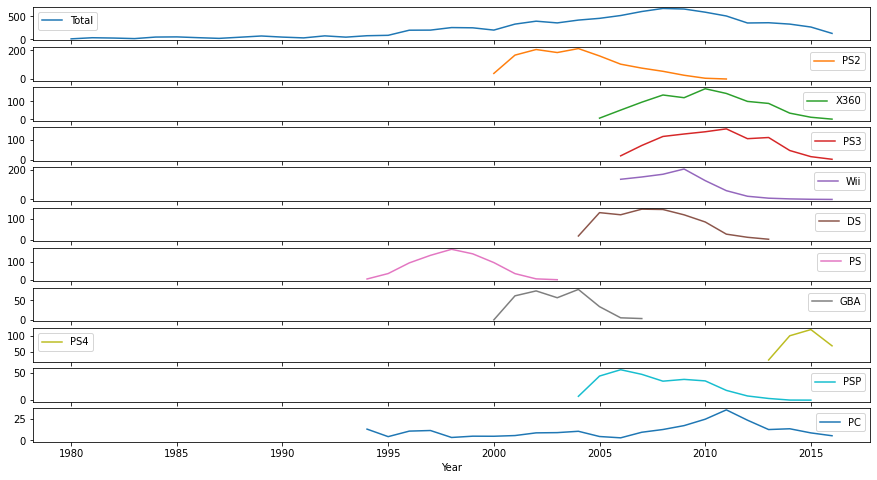

In [27]:
data_pivot.loc[1980:2016, 'Total':'PC']\
.plot(figsize=(15, 8), subplots=True, xlabel='Year'); 

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Средний жизненный цикл платформ определен верно. Он явно не превышает 10 лет.</div>

По данному графику можно сделать следующие выводы:
- Наиболее популярные (по количеству продаж) платформы появились после 95 года;
- Срок жизни (годы продаж игр для них) почти всех платформ составляет 5-10 лет, за исключением персональных компьютеров;
- Для ПК игры продаются на протяжении более 20 лет, хотя общее количество продаж значительно ниже;
- Пик продаж пришелся на 2008 год, после чего наблюжается снижение общего кол-ва покупок.

Такая форма графика для ПК может объясняться несколькими причинами:
- В отличие от приставок компьютеры совершенствуются с каждым годом, таким образом нет технических ограничений для игр. При улучшении приставок обычно им присваивают новое название и дальнейшие продажи попадают в другую категорию.
- Низкие продажи могут быть обусловлены большим количеством "пиратских" установок игр - для компьютеров это сделать значительно проще, чем для приставок. Чаще всего, в последних системы защиты и шифрования как на уровне программ, так и на уровне "железа", сложнее и надежнее. А для ПК в основном применяется только программное шифрование.

#### Изменение продаж по платформам в актуальном периоде

Теперь вернемся к выбранному ранее актуальному периоду и посмотрим на тенденцию последних лет.

In [28]:
data_pivot_actual = data_actual.pivot_table(values='total_sales', 
                                     index='year_of_release', 
                                     columns='platform', 
                                     aggfunc='sum', 
                                     margins=True,
                                     margins_name='Total')\
.sort_values(by='Total', axis=1, ascending=False)\
#.drop(labels='Total', axis=1)

data_pivot_actual

platform,Total,PS4,PS3,X360,3DS,XOne,WiiU,PC,PSV,Wii,DS,PSP
year_of_release,,,,,,,,,,,,
2012,355.75,NaN,107.35,99.74,51.36,NaN,17.56,23.14,16.19,21.71,11.01,7.69
2013,361.24,25.99,113.25,88.58,56.57,18.96,21.65,12.38,10.59,8.59,1.54,3.14
2014,331.53,100.00,47.76,34.74,43.76,54.07,22.03,13.28,11.90,3.75,NaN,0.24
2015,267.98,118.90,16.82,11.96,27.78,60.14,16.35,8.52,6.25,1.14,NaN,0.12
2016,129.94,69.25,3.60,1.52,15.14,26.15,4.60,5.25,4.25,0.18,NaN,NaN
Total,1446.44,314.14,288.78,236.54,194.61,159.32,82.19,62.57,49.18,35.37,12.55,11.19


Выборка платформ за последние 5 лет значительно меньше, что ожидаемо с учетом сделанного ранее вывода о сроке жизни платформ. Визуализируем данные:

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Все импорты библиотек лучше собрать в одной ячейке в самом начале проекта.</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Принято и исправлено.</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

👍</div>

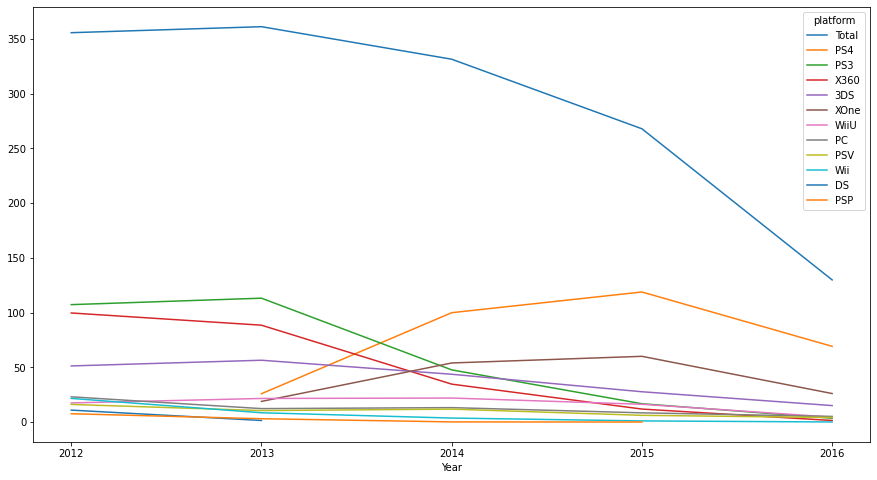

In [29]:
data_pivot_actual.loc[2012:2016]\
.plot(figsize=(15, 8), xlabel='Year')

#data_pivot_actual.index
plt.xticks(ticks=[2012, 2013, 2014, 2015, 2016]);

График выглядит не очень оптимистично - общие продажи игр уменьшаются и за последние 5 лет сократились более чем вдвое. Отрицательные тенденции наблюдаются практически на всех платформах, из общей картины можно выделить лишь `PS4` и `XOne`, которые являются самыми молодыми и, видимо именно поэтому, показавшие рост с 2013 по 2015 годы.

Тенденция общего снижения продаж выглядит не совсем понятной, возможно в данных не хватает информации по играм с какой-то новой платформы, которая и забрала к себе пользователей. Но чтобы проверить эту теорию имеющейся информации недостаточно.

Стоит учесть, что на графиках не учитываются те игры, год выпуска которых неизвестен. На всякий случай проверим влияние этих игр, найдя сумму проданных копий по платформам, попавшим в актуальный период:

In [30]:
data[
    (data['year_of_release'] == 0) &
    (data['platform'].isin(data_pivot_actual.columns))
]\
.groupby(by='platform')\
['total_sales']\
.sum()

platform
3DS      1.19
DS       3.34
PC       3.76
PS3      7.83
PSP      4.52
PSV      0.26
Wii     16.33
X360    10.18
Name: total_sales, dtype: float64

Почти 50 млн копий, довольно большое значение, но даже оно не изменит тенденцию общих продаж.

Возвращаясь к общему графику выделим 3 платформы, имеющих наибольшее количество продаж на 2016г.: `PS4`, `XOne`, `3DS`. Именно на этих платформах (из имеющегося списка) стоит сконцентрироваться для достижения наибольших показателей по продажам в 2017 г. Следует учитывать, что даже эти лидеры показывают уменьшение продаж, что также должно быть учтено при принятии бизнесс решений.



<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>
    
С выбором потенциально прибыльных платформ согласен.</div>

#### Построение графика разброса значений глобальных продаж по платформам:

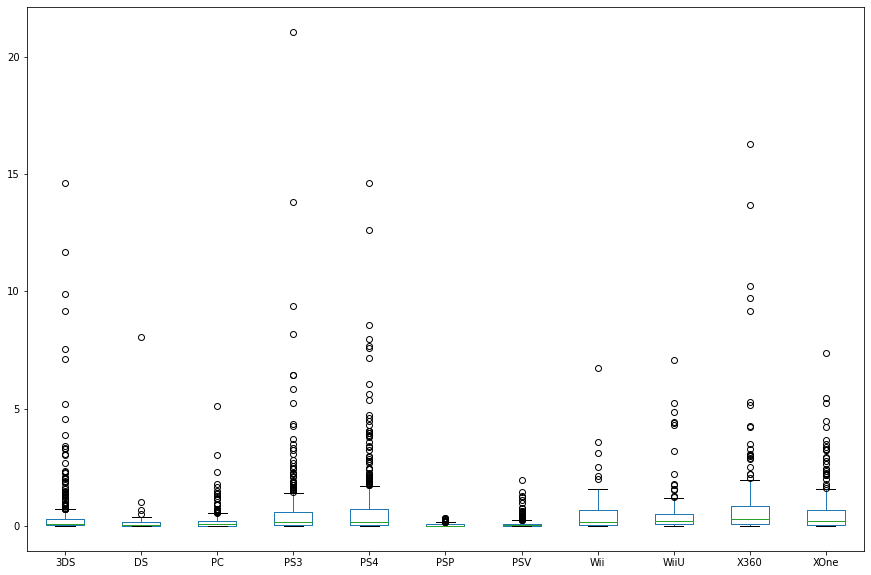

In [31]:
data_actual.pivot_table(index='name', columns='platform', values='total_sales', aggfunc=sum)\
.plot(kind='box', figsize=(15, 10)); 

Данный график дает представление о степени разброса значений продаж игр для разных платформ. На этом масштабе видно, что в основной массе продажи игр имеют близкие значения. Но у некоторых платформ имеются выбросы, указывающие на крайне удачные в продажах тайтлы. К таким платформам отнсятся: `3DS`, `PS3`, `PS4`, `X360`.

Увеличим масштаб и посмотрим ближе на основную массу значений продаж:

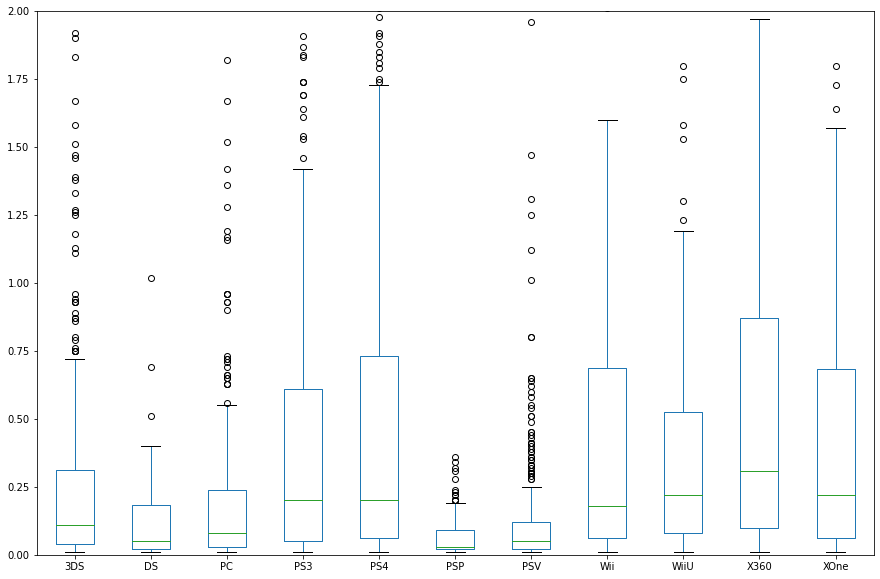

In [32]:
data_actual.pivot_table(index='name', columns='platform', values='total_sales', aggfunc=sum)\
.plot(kind='box', figsize=(15, 10), ylim=(0, 2)); 

На этом графике лучше видны распределения по основной массе продаж на разных платформах. Различия в среднем значении между платформами не очень большое. А вот значения выбросов отличаются в десятки раз. Платформы с большими средними продажами показывают и наибольшее количество популярных тайтлов. На это стоит обратить при выборе платформ для развития продаж.

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b> 

Группировка по годам в данном случае не нужна, с ней у нас несколько значений всего будет на каждую консоль, по одному на год. Тут идея другая: рассмотреть распределение продаж по всем играм. </div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Суть замечания кажется понял. Решил через сводную таблицу, чтобы отобразить все на одном графике, но не уверен, что это лучшее решение. Буду признателе за подсказку, если есть другие варианты решения.</div>

<div class="alert-warning">
<b>Комментарий ревьюера V2 ⚠️</b>

Для того чтобы вывести диаграмму размаха совсем не нужно агрегировать данные в сводную таблицу. 👇</div>

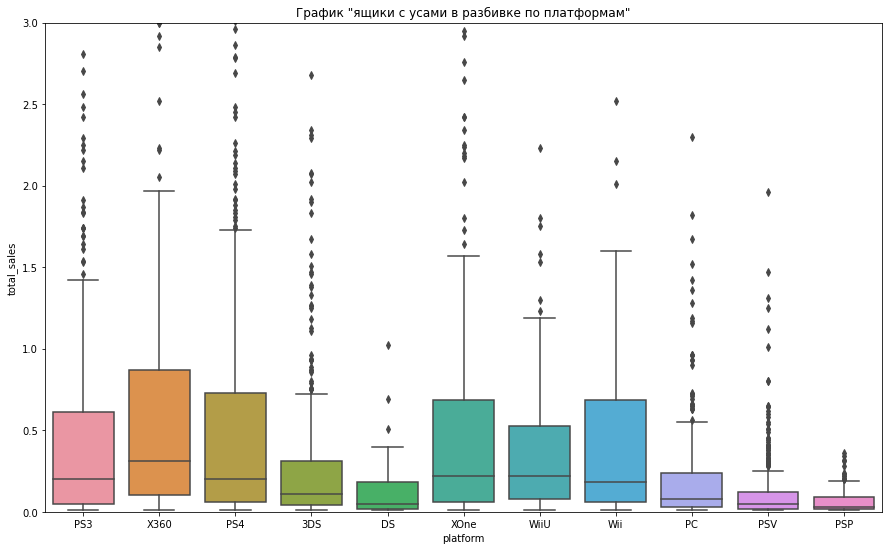

In [33]:
# Код ревьюера
import seaborn as sns

plt.figure(figsize= (15, 9))
sns.boxplot(x = data_actual['platform'], y = data_actual['total_sales'])
plt.title('График "ящики с усами в разбивке по платформам"')
plt.ylim(0, 3)
plt.show()

#### Взаимосвязь между оценками пользователей и критиков и продажами

Выберем наиболее популярную платформу из актуального периода и рассчитаем корреляцию между оценками критиков и общими продажами игр:

0.406567902061781

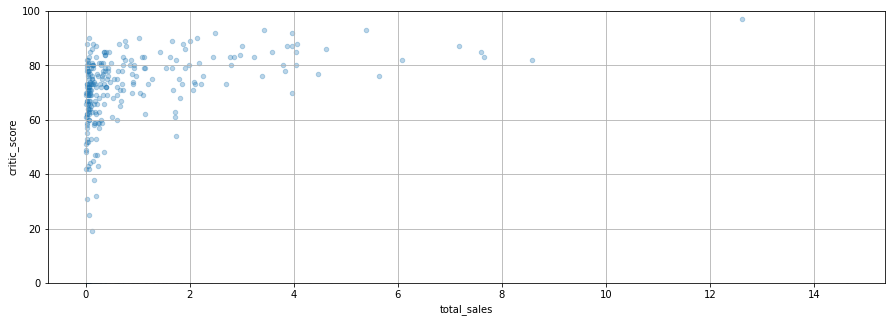

In [34]:
display(
    data_actual[(data_actual['platform'] == 'PS4') &
                (data_actual['critic_score'] != -1)]\
    ['total_sales']\
    .corr(data_actual['critic_score'])
)

data_actual[data_actual['platform'] == 'PS4']\
.plot(x='total_sales',
      y='critic_score',
      kind='scatter',
      grid=True,
      figsize=(15,5),
      alpha=0.3,
      ylim=(0,100)); # Учитываем только реальные оценки

Коэффициент корреляции довольно низок, а график наглядно показывает, что вне зависимости от оценок критиков игры могут продаваться плохо. Также стоит отметить, что у игр с высокими продажами высокие оценки критиков (хотя прямой взаимосвязи нет).

Рассчитаем корреляцию между оценками пользователей и общими продажами игр:

0.0012601648838544825

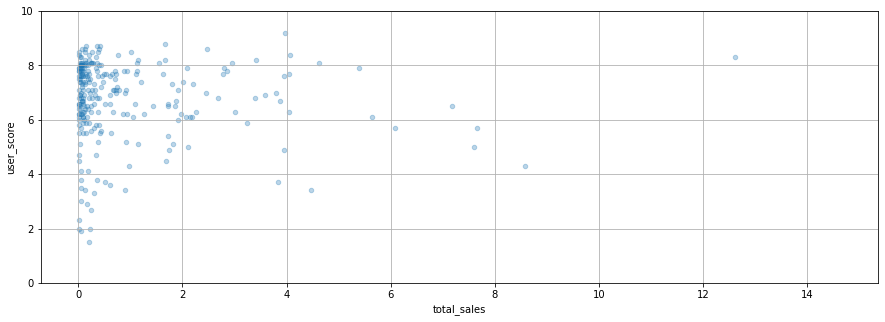

In [35]:
display(
    data_actual[(data_actual['platform'] == 'PS4') &
                (data_actual['critic_score'] != -1)]\
    ['total_sales']\
    .corr(data_actual['user_score'])
)

data_actual[data_actual['platform'] == 'PS4']\
.plot(x='total_sales', 
      y='user_score',
      kind='scatter',
      grid=True,
      figsize=(15,5),
      alpha=0.3,
      ylim=(0,10)); # Учитываем только реальные оценки

<div class="alert-success">
<b>Комментарий ревьюера V3 ✔️</b>

Верно, такие коэффициенты корреляции могут говорить о том, что на PS4 оценки критиков сильнее влияют на успешность игры.</div>

К-нт корреляции здесь практически равен нулю, что может объясняться субъктивностью оценок. И, в отличии от критиков, пользователи ставят низкие оценки вне зависимости от показателей продаж.

Следует полагать, что аналогичные выводы справедливы и для других платформ, а значит, при планировании бизнес решений в целях увеличения продаж, не стоит полагаться только на оценки критиков и пользователей. Проверим эту теорию построив графики корреляции и для двух других популярных в последние годы платформ.

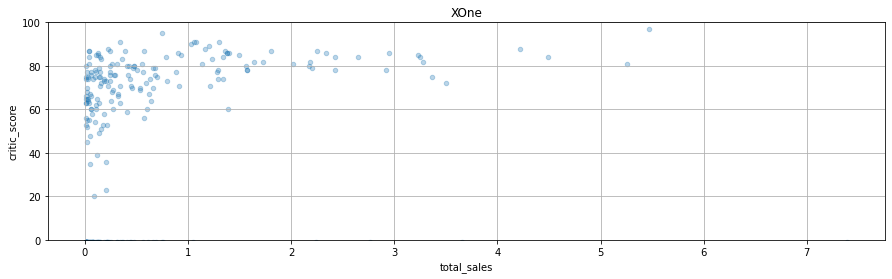

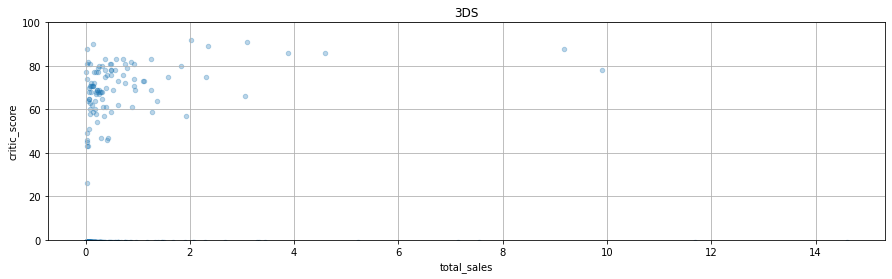

In [36]:
platforms_actual = ['XOne', '3DS']

for i in range(0, len(platforms_actual)):
    data_actual[data_actual['platform'] == platforms_actual[i]]\
    .plot(x='total_sales',
          y='critic_score',
          kind='scatter', 
          grid=True,
          alpha=0.3,
          title=f'{platforms_actual[i]}',
          ylim=(0,100),
         figsize=(15, 4));

И для отзывов пользователей:

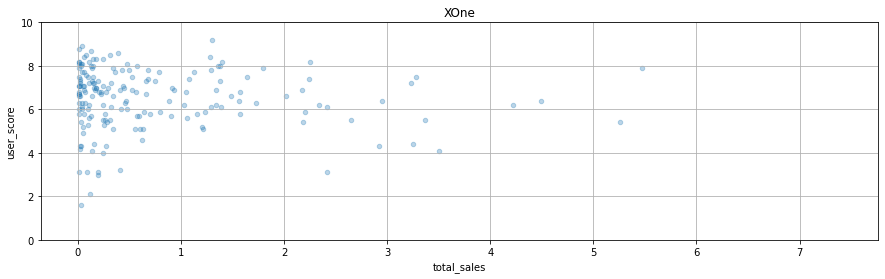

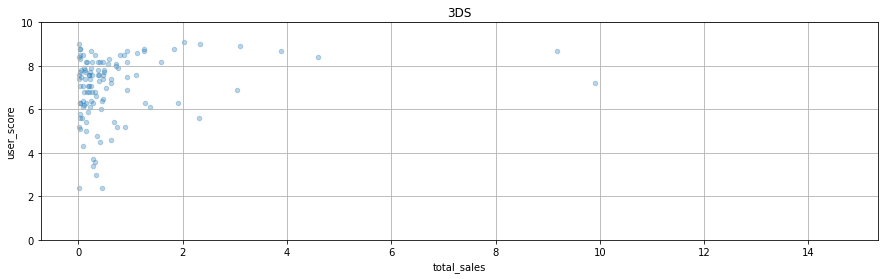

In [37]:
for i in range(0, len(platforms_actual)):
    data_actual[data_actual['platform'] == platforms_actual[i]]\
    .plot(x='total_sales',
          y='user_score',
          kind='scatter', 
          grid=True,
          alpha=0.3,
          title=f'{platforms_actual[i]}',
          ylim=(0,10),
         figsize=(15, 4));

Также расчитаем коэффициент корреляции между отзывами для этих платформ и продажами игр:

In [38]:
cor_list = ['critic_score', 'user_score']
platforms = ['PS4', '3DS']

for current_platform in platforms:
    platform_actual = data_actual.query('platform == @current_platform & user_score > 0 & critic_score > 0')
    for value in cor_list:
        print('Коэффициент корреляции', value, 'и total_sales для', current_platform)       
        print(platform_actual[value].corr(platform_actual['total_sales']))
    print()

Коэффициент корреляции critic_score и total_sales для PS4
0.40589480145836687
Коэффициент корреляции user_score и total_sales для PS4
-0.03362497447207173

Коэффициент корреляции critic_score и total_sales для 3DS
0.31055301915326294
Коэффициент корреляции user_score и total_sales для 3DS
0.20181252441109135



Таким образом наглядно видно, что между отзывами как критиков, так и пользователей и продажами нет прямой связи и для других популярных платформ.

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b> 

Обрати внимание, что ты считаешь корреляцию по данным, которые включают значения-заглушки - которыми ты заменял пропуски на этапе предобработки, а это сильно искажает результат.

Кроме того, ты посчитал корреляцию только по одной платформе, а по заданию нужно сравнить ситуацию на нескольких популярных платформах.</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил графики для еще двух популярных платформ. Исключил из расчета коэффициента "заглушки".</div>

<div class="alert-danger">
<b>Комментарий ревьюера V2 ❌</b> 

У меня получаются другие результаты, возьмем к примеру PS4 👇 Нужно будет пересчитать коэффициенты и вывод возможно изменится.</div>

<div class="alert alert-info"> <b>Комментарии студента **V2**:</b> Расчитал коэфициенты, но мне кажется вывод из-за этого не поменялся, так как значения далеки от 1. Тем, что один из к-тов оказался отрициательным </div>

In [39]:
# Код ревьюера
games_actual_PS4 = data_actual.query('platform == "PS4" & user_score > 0 & critic_score > 0')

cor_list = ['critic_score', 'user_score']

for value in cor_list:
    print('Коэффициент корреляции', value, 'и total_sales')
    print(games_actual_PS4[value].corr(games_actual_PS4['total_sales']))
    print()

Коэффициент корреляции critic_score и total_sales
0.40589480145836687

Коэффициент корреляции user_score и total_sales
-0.03362497447207173



<div class="alert-success">
<b>Комментарий ревьюера V3 ✔️</b>

Теперь коэффициенты корреляции рассчитаны верно!
    
</div>

#### Влияние жанров на продажи

Посмотрим на распределение игр по жанрам:

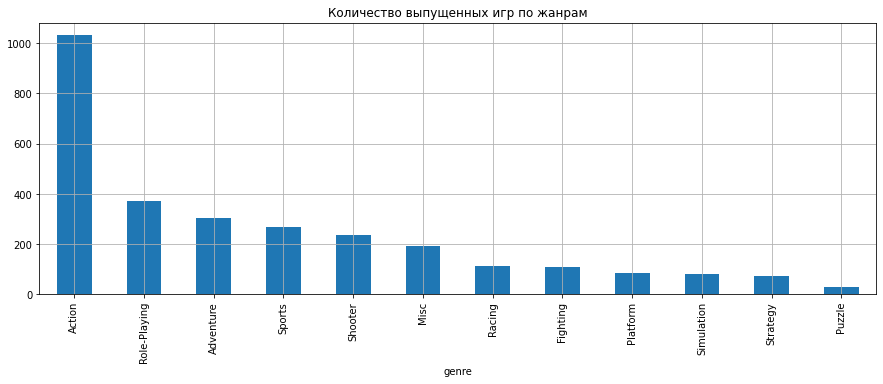

In [40]:
data_actual.groupby(by='genre')['total_sales']\
.count()\
.sort_values(ascending=False)\
.plot.bar(figsize=(15, 5),
          grid=True,
         title='Количество выпущенных игр по жанрам');

Жанр `Action` лидирует с большим отрывом, более 1000 игр только в актуальном периоде. Сразу за ним `RPG`, `Adventure` и `Sports`, замыкает пятерку лидеров жанр `Shooter`.

Теперь посмотрим на продажи этих жанров:

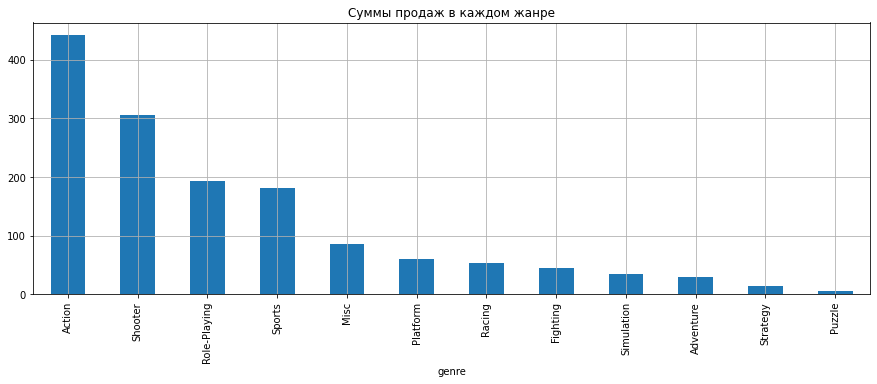

In [41]:
data_actual.groupby(by='genre')['total_sales']\
.sum()\
.sort_values(ascending=False)\
.plot.bar(figsize=(15, 5),
          grid=True,
         title='Суммы продаж в каждом жанре');

Первое место по продажам также занимает жанр `Action`, но отрыв по продажам значительно меньше чем по количеству игр. Затем следуют `Shooter`, `RPG` и `Sports`. А вместо `Adventure` в пятерку лидеров попали игры прочих жанров - `Misc`. 

Видимо количество выпущенных игр не всегда определяет суммы продаж. Чтобы подтвердить эту теорию посмотрим на график зависимости продаж от жанров: 

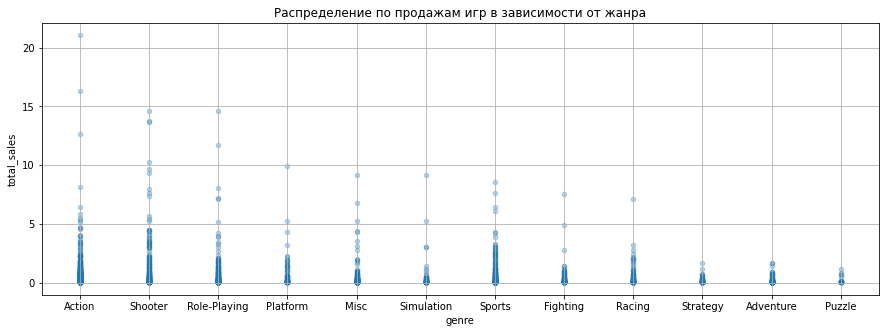

In [42]:
data_actual\
.plot(y='total_sales', 
      x='genre',
      kind='scatter',
      grid=True,
      figsize=(15,5),
      alpha=0.3,
      title='Распределение по продажам игр в зависимости от жанра'
     );

Игры с самыми большими продажами относятся к `Action`, `Shooter` и `RPG`. 

Посмотрим на среднее количество продаж:

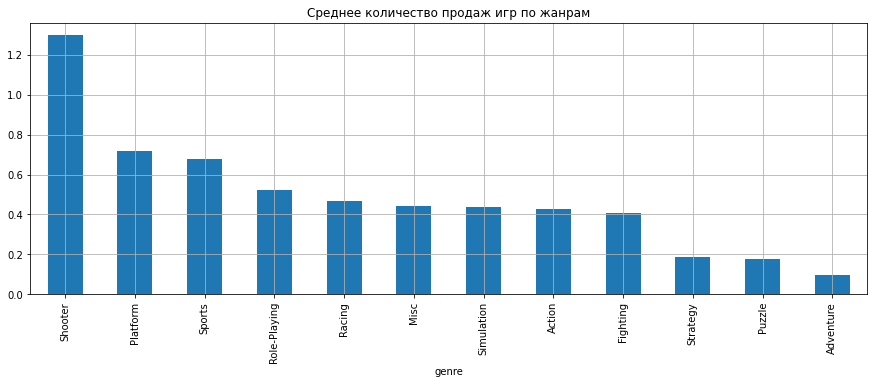

In [43]:
data_actual.groupby(by='genre')['total_sales']\
.mean()\
.sort_values(ascending=False)\
.plot(kind='bar', grid=True, figsize=(15,5), title='Среднее количество продаж игр по жанрам');

#plt.xticks(
#    ticks=np.arange(len(data_actual['genre'].unique().tolist())),
#    labels=data_actual['genre'].unique().tolist()
#);

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b> 

У меня получается другой лидер по средним продажам 👇</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Ошибка заключалась в том, что я передал подписи на ось Х, которые не соответствовали значениям. Исправлено.</div>

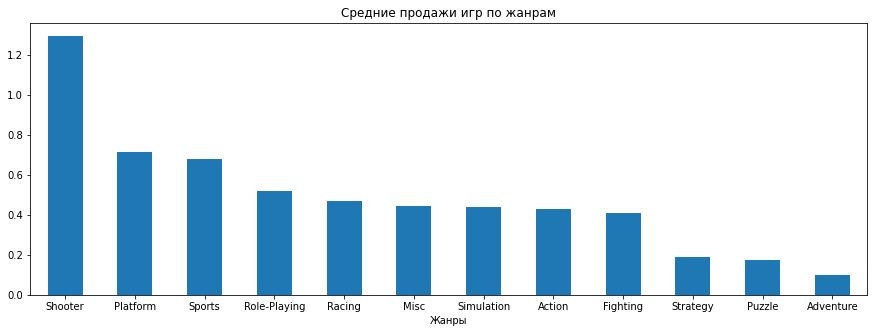

In [44]:
# Код ревьюера
data_actual.groupby('genre')['total_sales'].mean().sort_values(ascending= False)\
  .plot(kind = 'bar', figsize = (15,5), title = 'Средние продажи игр по жанрам')


plt.xticks(rotation = 0)
plt.xlabel('Жанры')
plt.show()

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Верно, теперь лидер прибыльности жанров поменялся.</div>

Как видно, среди лидеров по продажам в жанрах `Action` и `RPG`, есть и менее удачные тайтлы, которые "тянут" среднее значение вниз. А жанр `Shooter` показывает хорошие результаты - средние продажи этого жанра выше прочих.

***Выводы:***
1) Датасет предоставляет данные за период с 1980 по 2016 годы. Условно этот период можно разделить на несколько участков:
- 1980-1993 - становление игровой индустрии, низкие продажи;
- 1994-2004 - быстрый рост продаж;
- 2005-2011 - пик продаж;
- 2012-2016 - снижение количества продаж.

2) В качестве актуального периода для анализа выбран последний, так как он отображает текущего потребителя и состояние рынка;

3) По общему графику распределения игр по годам и платформам сделаны следующие выводы:
- Срок жизни платформ составляет в среднем 5-10 лет, исключение представляют персональные компьютеров;
- Пик продаж пришелся на 2008 год, после чего наблюжается снижение общего кол-ва покупок.

4) За последние 5 лет общие продажи игр сократились более чем вдвое. Среди продаж по платформам лидируют `PS4` и `XOne`, но и они показывают снижение продаж. 

    _Рекомендуется провести дополнительный анализ для выявления причин сокращения продаж, возможно в датасет не попали платформы, появившиеся в 2014 и более поздних годах. Появление таких платформ могло бы объяснить снижение продаж по остальным._

5) В основной массе продажи игр имеют близкие средние значения. У некоторых платформ имеются выбросы, указывающие на крайне удачные в продажах тайтлы. К таким платформам отнсятся: `3DS`, `PS3`, `PS4`, `X360`. На них стоит обратить внимание при выборе платформ для развития продаж.

6) Прямой взаимосвязи между оценками пользователей и критиков и продажами не выявлено.

7) Лучше всего продаются игры жанра `Action`, затем следуют жанры `Shooter`, `RPG` и `Sports`. Если говорить о средних значениях продаж, то наиболее стабильно продается жанр `Shooter`.

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Отдельные пункты вывода по разделу нужно будет поправить после доработок.

</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Исправлено.</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Отлично! </div>

## Составление портрета пользователя

Проведем отдельный анализ для пользователей разных регионов - `NA`, `EU`, `JP`. Это поможет выстроить разную региональную политику и в целом принять решение о работе в том или ином регионе.

### Для начала определим наиболее популярные платформы:

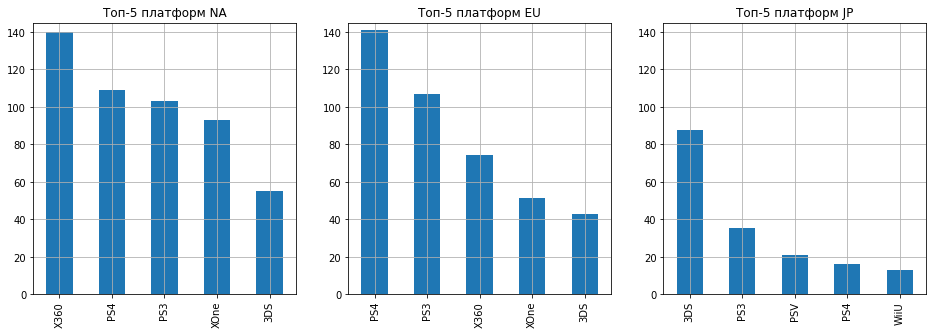

In [46]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
region = ['NA', 'EU', 'JP']

for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    data_actual.groupby(by='platform')[sales[i]]\
    .sum()\
    .sort_values(ascending=False)\
    .head(5)\
    .plot(kind='bar',
          title=f'Топ-5 платформ {region[i]}',
          figsize=(16, 5),
          xlabel='',
          ylim=(0, 145),
          grid=True);

Как видно из диаграм предпочтения пользователей в разных регионах отличаются. Три платформы популярны везде: `PS4`, `PS3`, `3DS`. Стоит учесть это, если компания планирует продавать во всех регионах одновременно. Образает на себя внимание схожесть предпочтений у пользователей `NA` и `EU` - 5-ку лидеров составляют одни и те же платформы. Возможно дело в схожести культур Европы и Северной Америки.
Также стоит отметить, что продажи в `NA` и `EU` выше, чем в `JP`.

### Теперь посмотрим какие жанры нравятся пользователям:

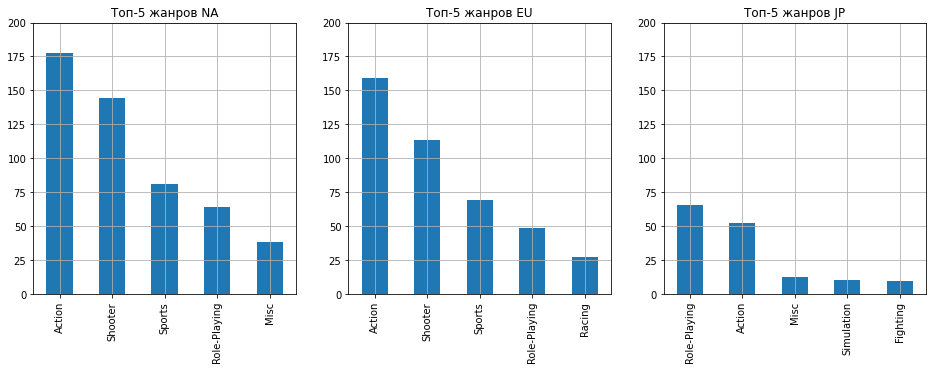

In [47]:
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    data_actual.groupby(by='genre')[sales[i]]\
    .sum()\
    .sort_values(ascending=False)\
    .head(5)\
    .plot(kind='bar',
          title=f'Топ-5 жанров {region[i]}',
          figsize=(16, 5),
          xlabel='',
          ylim=(0, 200),
          grid=True);

Наиболее популярные жанры по всему миру - `Action` и `RPG`, они вошли в пятерку во всех регионах. `Shooter` и `RPG` отлично продаются в Европе и Америке. Также снова можно увидеть, что `NA` и `EU` пользователи придерживаются практически одинаковых предпочтений. А вот игроки из Японии предпочитают несколько другие жанры.


<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Портреты игроков различных регионов по платформам и жанрам составлены верно.</div>


### Осталось посмотреть как на продажи в регионах влияет рейтинг `ESRB`:

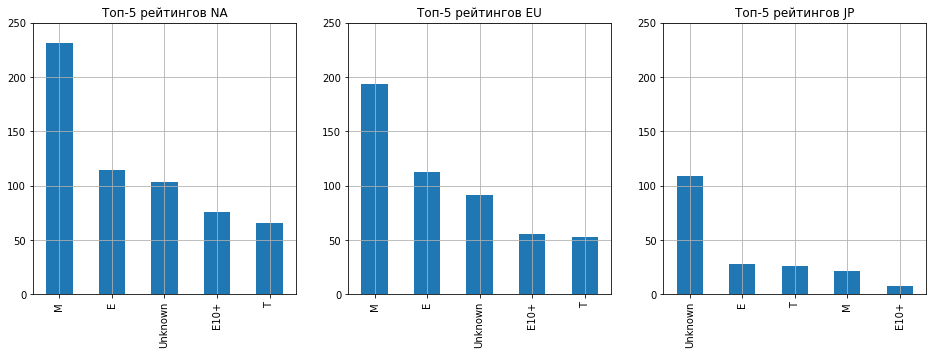

In [48]:
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    data_actual.groupby(by='rating')[sales[i]]\
    .sum()\
    .sort_values(ascending=False)\
    .head(5)\
    .plot(kind='bar',
          title=f'Топ-5 рейтингов {region[i]}',
          figsize=(16, 5),
          xlabel='',
          ylim=(0, 250),
          grid=True);

Единомыслие `NA` и `EU` пользователей можно считать доказанным - все популярные жанры совпадают. Наибольшим успехом пользуются игры 17+, возможных причин может быть несколько, одна из них - высокий средний возраст игроков, но для проверки гипотезы нужно провести отдельное исследование.

У игроков из Японии на первое место вышли игры, рейтинг которых неизвестен, для того, чтобы назвать лидера необходимо дополнить данные.

***Выводы:***
1) Предпочтения игроков по всему миру отличаются, при этом Севреная Америка и Европа имеют много общего, а японские геймеры явно имеют отличающиеся интересы;
2) Наиболее популярные платформы по всему миру - `PS4`, `PS3`, `3DS`;
3) Наиболее популярные жанры по всему миру - `Action` и `RPG`;
4) Наиболее популярные жанры в Северной Америке и Европе - `M`, `E`, `E10+`, `T`. В Японии - `E`, `T`, `M`, `E10+`.



<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Правильно, что не забыл игры без рейтинга ESRB. Их лидерство в Японии можно объяснить возможным наличием там своего стандарта для рейтингов.</div>

## Проверка гипотез
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки сформулируем нулевую и альтернативную гипотезы:
H_0: Средний пользовательский рейтинг платформы `XOne` = Средний пользовательский рейтинг платформы `PC`
H_a: Средний пользовательский рейтинг платформы `XOne` ≠ Средний пользовательский рейтинг платформы `PC`

Примем 5% уровень значимости
alpha = 0.05

Таким образом проведя тест Стьюдента мы получим вероятность того, что среднее значение рейтинга платформы `PC` близко или равно рейтингу платформы `XOne`. В качестве результата теста мы можем утверждать, что гипотеза неверна в случае если расчетная вероятность мала - другими словами вероятность равенства двух средних мало настолько, что нельзя говорить об их равенстве. Если же вероятность больше уровня значимости, значит отвергать такую гипотезу нельзя (_Прим. это не является основанием для подтверждения верности нулевой гипотезы_) 

In [49]:
from scipy import stats as st

In [50]:
results = st.ttest_ind(
    (data_actual[(data_actual['platform'] =='XOne') &
                 (data_actual['user_score'] != -1)]
     ['user_score']),
    (data_actual[(data_actual['platform'] =='PC') & 
                 (data_actual['user_score'] != -1)]
     ['user_score']),
    equal_var = False)

alpha = .05

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5065923213162264
Не получилось отвергнуть нулевую гипотезу


<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

Метод проверки гипотезы выбран верно. Но в выборках не должно быть значений-заглушек 👇, тогда результат будет достоверный.</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Исправлено.</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Результат проверки гипотезы правильный.</div>

<AxesSubplot:>

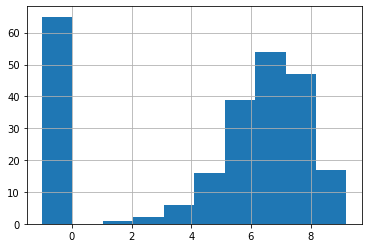

In [51]:
# Код ревьюера
data_actual[data_actual['platform'] =='XOne']['user_score'].hist()

**Вывод:** По результатам теста исключить нулевую гипотезу нельзя, а значит средние пользовательские рейтинги платформ `Xbox One` и `PC` могут быть одинаковыми.

### Средние пользовательские рейтинги жанров Action  и Sports разные

H_0: Средний пользовательский рейтинг жанра `Action` = Средний пользовательский рейтинг жанра `Sports`
H_a: Средний пользовательский рейтинг жанра `Action` ≠ Средний пользовательский рейтинг жанра `Sports`

Примем 5% уровень значимости
alpha = 0.05

In [52]:
results = st.ttest_ind(
    (data_actual[
        (data_actual['genre'] =='Action') &
        (data_actual['user_score'] != -1)]
     ['user_score']),
    (data_actual[(data_actual['genre'] =='Sports') &
                 (data_actual['user_score'] != -1)]
     ['user_score']),
    equal_var = False)

alpha = .05

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.989172574568752e-20
Отвергаем нулевую гипотезу


**Вывод:** По результатам теста мы должны отвергнуть нулевую теорию, а значит средние пользовательские рейтинги жанров Action  и Sports отличаются.

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

Аналогично и по проверке второй гипотезы.</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Исправлено.</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Здесь тоже теперь все верно.</div>

<div class="alert-warning">
<b>Комментарий ревьюера V2 ⚠️</b>

Хорошо бы сформулировать краткий вывод по этому разделу проверки гипотез.</div>

## Общий вывод
### Исходная задача
Необходимо провести анализ исторических сведений о продажах игр на разных платформах в разных регионах. Результаты анализа будут использованы для построения стратегии продаж и маркетинговых компаний в 2017 году.

Исходные данные содержат 16715 записей, каждая из которых предоставляет сведения об игре: название, платформа, год выпуска, продажи по регионам, рейтинг и возрастные ограничения. Данные представлены более чем за 30 лет, с 1980 года.

**Цели исследования:**
1. Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5);
    - Самые популярные жанры (топ-5);
    - Влияние рейтинга ESRB на продажи в отдельном регионе.
2. Проверить гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.

### Обработка данных
- Названия приведены к "нормальному" типу;
- Следующим образом обработаны пропуски:
    - столбец `name`, 2 пропуска - заменены на `Unknown`;
    - столбец `year_of_release`, 269 пропусков - заменены на `0`;
    - столбец `genre`, 2 пропуска - заменены на `Unknown`;
    - столбец `critic_score`, 8578 пропусков - заменены на `-1`;
    - столбец `user_score`, 6701 пропуск - заменены на `-1`;
    - столбец `rating`, 6766 пропусков - заменены на `Unknown`.
- Значения `tbd` в `user_score` заменены на `-1`;
- Обнаружены и удалены 5 дубликатов по паре "название игры - платформа";
- Изменены типы данных:
    - `year_of_release` на тип `int16`;
    - `critic_score` на тип `int8`;
    - `user_score` на тип `float32`;
    - `user_score` на тип `float32`;
- Добавлен столбец с общими продажами - `total_sales`.

### Анализ данных
1) Датасет предоставляет данные за период с 1980 по 2016 годы. Условно этот период можно разделить на несколько участков:
- 1980-1993 - становление игровой индустрии, низкие продажи;
- 1994-2004 - быстрый рост продаж;
- 2005-2011 - пик продаж;
- 2012-2016 - снижение количества продаж.

2) В качестве актуального периода для анализа выбран последний, так как он отображает текущего потребителя и состояние рынка;

3) По общему графику распределения игр по годам и платформам сделаны следующие выводы:
- Срок жизни платформ составляет в среднем 5-10 лет, исключение представляют персональные компьютеров;
- Пик продаж пришелся на 2008 год, после чего наблюжается снижение общего кол-ва покупок.

4) За последние 5 лет общие продажи игр сократились более чем вдвое. Среди продаж по платформам лидируют `PS4` и `XOne`, но и они показывают снижение продаж. 

    (_Рекомендуется провести дополнительный анализ для выявления причин сокращения продаж, возможно в датасет не попали платформы, появившиеся в 2014 и более поздних годах. Появление таких платформ могло бы объяснить снижение продаж по остальным._)

5) В основной массе продажи игр имеют близкие средние значения. У некоторых платформ имеются выбросы, указывающие на крайне удачные в продажах тайтлы. К таким платформам отнсятся: `3DS`, `PS3`, `PS4`, `X360`. На них стоит обратить внимание при выборе платформ для развития продаж.

6) Прямой взаимосвязи между оценками пользователей и критиков и продажами не выявлено.

7) Лучше всего продаются игры жанра `Action`, затем следуют жанры `Shooter`, `RPG` и `Sports`. Если говорить о средних значениях продаж, то наиболее стабильно продается жанр `Shooter`.

### Предпочтения пользователей
1) Предпочтения игроков по всему миру отличаются, при этом Севреная Америка и Европа имеют много общего, а японские геймеры явно имеют отличающиеся интересы;

2) Наиболее популярные платформы по всему миру - `PS4`, `PS3`, `3DS`;

3) Наиболее популярные жанры по всему миру - `Action`, `Shooter` и `RPG`;

4) Наиболее популярные жанры в Северной Америке и Европе - `M`, `E`, `E10+`, `T`. В Японии - `E`, `T`, `M`, `E10+`.

### Проверка гипотез
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    
    * По результатам теста исключить нулевую гипотезу нельзя, а значит средние пользовательские рейтинги платформ `Xbox One` и `PC` могут быть одинаковыми.
    
2) Средние пользовательские рейтинги жанров Action  и Sports разные
    
    * По результатам теста мы должны отвергнуть нулевую теорию, а значит средние пользовательские рейтинги жанров Action  и Sports отличаются.
    
### Рекомендации

В целях достижения наибольших показателей продаж рекомендуется сосредоточиться на регионах `NA` и `EU`, так как объемы продаж в них наибольшие. Говоря о платформах, следует в первую очередь сконцентрировать внимание на `PS3`, `PS4`, `X360`, в этих регионах они наиболее востребованы. Учитывая снижение спроса потребителя необходимо провести дополнительный анализ рынка, вероятнее всего есть новые платформы, которые забрали значительную часть пользователей, а значит с ётими платформами можно добиться более высоких показателей продаж.

Говоря о жанрах, наиболее перспективными являются `Action`, `Shooter` и `RPG`. 

По рейтингу безусловным лидером является `M`, продажи этих игр самые высокие.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

У тебя получился очень подробный общий вывод, отражающий все основные результаты исследования. 

Отдельные пункты вывода надо будет немного скорректировать после внесения изменений в работу.

Не хватает только рекомендаций магазину видеоигр, для которого мы проводили исследование. Подумай пожалуйста как их можно сформулировать, на каких платформах, жанрах и рейтингах, в каких регионах им нужно сконцентрироваться?</div>

<div style="border:solid blue 3px; padding: 20px">
<b>Общий комментарий ревьюера:</b>

Проделана большая работа, но нужно кое-что поправить чтобы я ее принял.
    
Есть несколько критических замечаний:
- по графику "ящики с усами"
- по определению корреляций оценок и продаж
- по оценке прибыльности жанров
- по проверке гипотез
   
Также, постарайся отработать желтые комментарии.
    
Буду ждать твой доработанный проект. ⌛️</div>

<div style="border:solid blue 3px; padding: 20px">
<b>Общий комментарий ревьюера V2</b>

Спасибо, что дорабатываешь проект. У меня остались вопросы только к расчету корреляций. Я оставил пример, как можно быстро все посчитать для нескольких платформ.

Уверен ты быстро с этим справишься.

</div>

<div style="border:solid blue 3px; padding: 20px">
<b>Общий комментарий ревьюера V3</b>

Критические замечания исправлены. У тебя получилась очень хорошая работа: отличный код, наглядные графики и правильные выводы.

Успехов в дальнейшем обучении!🤝

</div>